### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from sklearn.linear_model import(
    LinearRegression,
    Lasso,
    Ridge
)
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    train_test_split,
    GridSearchCV
)
from feature_engine.selection import SelectBySingleFeaturePerformance

In [2]:
warnings.filterwarnings("ignore")

### Load the data

In [3]:
flights_preprocessed = pd.read_csv("../data/train_preprocessed_data.csv")

In [4]:
flights_preprocessed

,airline__airline_Air India,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_Multiple Carriers,airline__airline_other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,...,duration__duration_rbg_75,duration__duration_cat,duration__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info,price
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,-0.857930,...,-0.107799,2.0,-0.033916,1.0,0,1.0,0.0,0.0,1,7832
1,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.065418,...,-0.107799,2.0,0.046422,1.0,0,1.0,0.0,0.0,1,6540
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.058824,0.833333,0.067797,-0.857930,...,-0.107799,0.0,-0.917631,0.0,1,0.0,1.0,0.0,0,7305
3,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.203928,...,-0.107799,2.0,-0.174507,1.0,0,0.0,1.0,0.0,0,8366
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.117647,0.166667,0.093220,-0.857930,...,-0.107799,2.0,-0.214676,1.0,0,1.0,0.0,0.0,1,11087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,1.065418,...,-0.107799,2.0,2.597145,2.0,0,0.0,1.0,0.0,0,11093
6691,1.0,0.0,0.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,-0.203928,...,-0.107799,2.0,-0.174507,1.0,0,0.0,1.0,0.0,0,8891
6692,0.0,0.0,1.0,0.0,0.0,1.000000,0.764706,0.833333,0.779661,1.065418,...,-0.107799,1.0,-0.666576,1.0,0,1.0,0.0,0.0,1,10262
6693,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.974576,1.065418,...,-0.107799,1.0,-0.606322,1.0,0,0.0,1.0,0.0,0,6152


In [5]:
X = flights_preprocessed.drop(columns="price")
y = flights_preprocessed["price"]

In [6]:
X

,airline__airline_Air India,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_Multiple Carriers,airline__airline_other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,...,duration__duration_rbg_50,duration__duration_rbg_75,duration__duration_cat,duration__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,-0.857930,...,-0.107976,-0.107799,2.0,-0.033916,1.0,0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.065418,...,-0.107976,-0.107799,2.0,0.046422,1.0,0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.058824,0.833333,0.067797,-0.857930,...,-0.107976,-0.107799,0.0,-0.917631,0.0,1,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.203928,...,-0.107976,-0.107799,2.0,-0.174507,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.117647,0.166667,0.093220,-0.857930,...,-0.107975,-0.107799,2.0,-0.214676,1.0,0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,1.065418,...,-0.107976,-0.107799,2.0,2.597145,2.0,0,0.0,1.0,0.0,0
6691,1.0,0.0,0.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,-0.203928,...,-0.107976,-0.107799,2.0,-0.174507,1.0,0,0.0,1.0,0.0,0
6692,0.0,0.0,1.0,0.0,0.0,1.000000,0.764706,0.833333,0.779661,1.065418,...,-0.107976,-0.107799,1.0,-0.666576,1.0,0,1.0,0.0,0.0,1
6693,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.974576,1.065418,...,-0.107976,-0.107799,1.0,-0.606322,1.0,0,0.0,1.0,0.0,0


In [7]:
y

0        7832
1        6540
2        7305
3        8366
4       11087
        ...  
6690    11093
6691     8891
6692    10262
6693     6152
6694    14594
Name: price, Length: 6695, dtype: int64

### Technique 1 - Correlation Analysis

<Axes: >

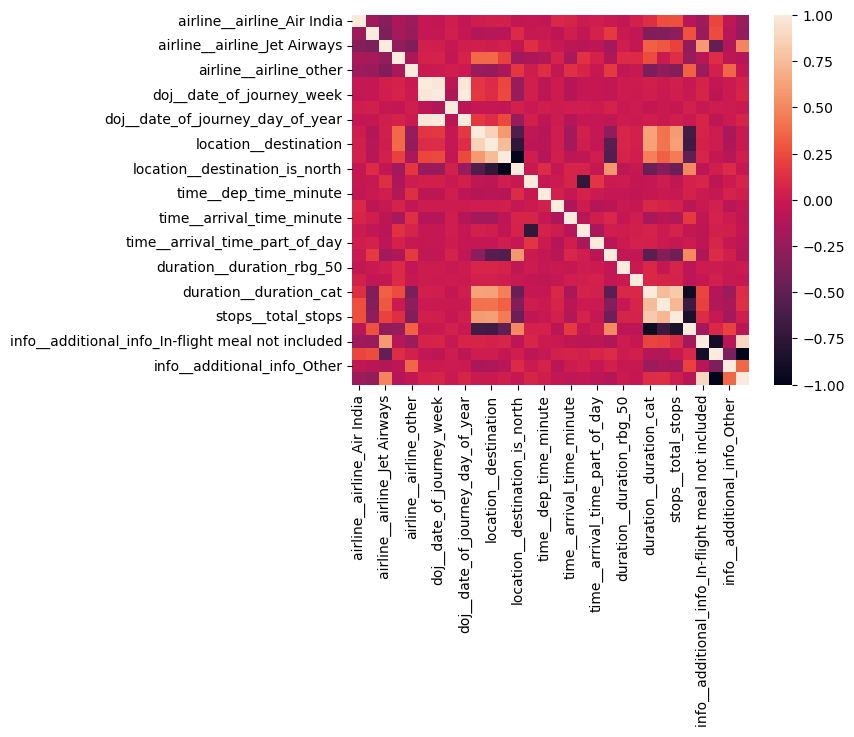

In [8]:
sns.heatmap(X.corr())

In [10]:
df1 = flights_preprocessed.corr()["price"].to_frame().reset_index().rename(columns={"index":"feature","price":"corr_coeff"})
df1

,feature,corr_coeff
0,airline__airline_Air India,0.051115
1,airline__airline_Indigo,-0.358446
2,airline__airline_Jet Airways,0.439763
3,airline__airline_Multiple Carriers,0.139855
4,airline__airline_other,-0.343588
5,doj__date_of_journey_month,-0.126483
6,doj__date_of_journey_week,-0.164143
7,doj__date_of_journey_day_of_week,0.041950
8,doj__date_of_journey_day_of_year,-0.162817
9,location__source,0.341973


### Technique 2 - Random Forest Feature Importance

In [11]:
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X,y)

# Extract the feature importance scores
df2 = pd.DataFrame({
    'feature':X.columns,
    "rf_importance":rf.feature_importances_
}).sort_values(by="rf_importance",ascending=False)

df2

,feature,rf_importance
23,duration__duration,0.448338
8,doj__date_of_journey_day_of_year,0.172286
2,airline__airline_Jet Airways,0.088595
26,info__additional_info_In-flight meal not included,0.034196
24,stops__total_stops,0.031156
15,time__arrival_time_hour,0.028216
13,time__dep_time_hour,0.023230
14,time__dep_time_minute,0.020234
3,airline__airline_Multiple Carriers,0.019591
6,doj__date_of_journey_week,0.019105


### Technique 3 - Gradient Boosting Feature importances

In [12]:
# Train a Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X,y)

# Extract feature importance scores
df3 = pd.DataFrame({
    "feature":X.columns,
    "gb_importance":gb.feature_importances_
}).sort_values(by="gb_importance",ascending=False)

df3

,feature,gb_importance
23,duration__duration,0.483008
8,doj__date_of_journey_day_of_year,0.188390
2,airline__airline_Jet Airways,0.113731
26,info__additional_info_In-flight meal not included,0.066523
24,stops__total_stops,0.036472
1,airline__airline_Indigo,0.022160
3,airline__airline_Multiple Carriers,0.015130
15,time__arrival_time_hour,0.012872
6,doj__date_of_journey_week,0.011115
28,info__additional_info_Other,0.007963


### Technique 4 - Permutation Importance

In [13]:
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X,y)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf,X, y, n_repeats=30, random_state=42)

df4 = pd.DataFrame({
    "feature":X.columns,
    "permutation_importane":perm_importance.importances_mean
}).sort_values(by="permutation_importane",ascending=False)

df4

,feature,permutation_importane
2,airline__airline_Jet Airways,1.089611
23,duration__duration,0.576284
8,doj__date_of_journey_day_of_year,0.401987
15,time__arrival_time_hour,0.351049
24,stops__total_stops,0.083293
3,airline__airline_Multiple Carriers,0.068517
26,info__additional_info_In-flight meal not included,0.055855
14,time__dep_time_minute,0.053220
13,time__dep_time_hour,0.036487
16,time__arrival_time_minute,0.030801


### Technique 5 - LASSO

In [14]:
# Train a LASSO Regression Model
lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(X,y)

df5 = pd.DataFrame({
    "feature":X.columns,
    "lasso_coeff":lasso.coef_
}).sort_values(by="lasso_coeff",ascending=False)

df5

,feature,lasso_coeff
5,doj__date_of_journey_month,4.902707e+03
2,airline__airline_Jet Airways,3.129228e+03
24,stops__total_stops,1.802193e+03
22,duration__duration_cat,7.961750e+02
10,location__destination,7.599811e+02
28,info__additional_info_Other,5.820041e+02
13,time__dep_time_hour,5.503309e+02
3,airline__airline_Multiple Carriers,4.470268e+02
7,doj__date_of_journey_day_of_week,3.913115e+02
16,time__arrival_time_minute,2.802866e+02


### Technique 6 - RFE

In [15]:
# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE 
rfe = RFE(estimator,n_features_to_select=X.shape[1],step=1)
rfe = rfe.fit(X,y)

# Get the selected features based on RFE
selected_features = X.columns[rfe.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = rfe.estimator_.feature_importances_

df6 = pd.DataFrame({
    "feature": selected_features,
    "rfe_score": selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

df6

,feature,rfe_score
23,duration__duration,0.452262
8,doj__date_of_journey_day_of_year,0.168809
2,airline__airline_Jet Airways,0.086064
26,info__additional_info_In-flight meal not included,0.037695
24,stops__total_stops,0.031034
15,time__arrival_time_hour,0.026355
13,time__dep_time_hour,0.023532
14,time__dep_time_minute,0.019733
6,doj__date_of_journey_week,0.019696
3,airline__airline_Multiple Carriers,0.019009


### Technique 7 - Linear Regression Weights

In [16]:
# Train a linear regression model 
lin_reg = LinearRegression()
lin_reg.fit(X,y)

df7 = pd.DataFrame({
    "feature":X.columns,
    "reg_coeffs":lin_reg.coef_
}).sort_values(by="reg_coeffs", ascending=False)
df7

,feature,reg_coeffs
2,airline__airline_Jet Airways,3.275014e+16
3,airline__airline_Multiple Carriers,3.275014e+16
0,airline__airline_Air India,3.275014e+16
4,airline__airline_other,3.275014e+16
1,airline__airline_Indigo,3.275014e+16
29,info__additional_info,1.102172e+15
8,doj__date_of_journey_day_of_year,4.302202e+13
5,doj__date_of_journey_month,4.906948e+03
24,stops__total_stops,1.781736e+03
22,duration__duration_cat,8.146992e+02


In [17]:
merged_df = df1.merge(df2,on="feature").merge(df3,on="feature").merge(df4,on="feature").merge(df5,on="feature").merge(df6,on="feature").merge(df7,on="feature").set_index("feature")
merged_df.sort_values(by=["corr_coeff","rf_importance","gb_importance","permutation_importane","lasso_coeff","rfe_score","reg_coeffs"],ascending=False)

,corr_coeff,rf_importance,gb_importance,permutation_importane,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
duration__duration_cat,0.627537,0.003043,0.003034,0.002333,7.961750e+02,0.002895,8.146992e+02
stops__total_stops,0.606676,0.031156,0.036472,0.083293,1.802193e+03,0.031034,1.781736e+03
duration__duration,0.511224,0.448338,0.483008,0.576284,-2.585674e+01,0.452262,-9.924383e+00
airline__airline_Jet Airways,0.439763,0.088595,0.113731,1.089611,3.129228e+03,0.086064,3.275014e+16
location__destination,0.347252,0.006205,0.000934,0.011213,7.599811e+02,0.006683,7.476063e+02
location__source,0.341973,0.007928,0.003437,0.017726,-3.553889e+02,0.007285,-3.676206e+02
location__source_is_north,0.173500,0.001456,0.000570,0.001450,-1.655816e+03,0.001510,-2.560357e+14
airline__airline_Multiple Carriers,0.139855,0.019591,0.015130,0.068517,4.470268e+02,0.019009,3.275014e+16
duration__duration_rbg_50,0.063731,0.010099,0.003133,0.014243,2.111854e+01,0.009772,2.177097e+01


In [27]:
merged_df.shape

(30, 7)

### with selected cols

In [18]:
estimator = RandomForestRegressor(n_estimators=500, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2",
    threshold=0.1
) 

In [19]:
temp_df = selector.fit_transform(X,y)

In [20]:
temp_df

,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,time__arrival_time_hour,duration__duration_rbg_25,duration__duration_cat,duration__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.176471,0.169492,-0.857930,-0.736484,0.826087,-0.364262,2.0,-0.033916,1.0,0
1,0.0,1.0,0.0,0.235294,0.220339,1.065418,1.061694,0.173913,-0.364262,2.0,0.046422,1.0,0
2,0.0,0.0,1.0,0.058824,0.067797,-0.857930,-0.736484,0.608696,2.373008,0.0,-0.917631,0.0,1
3,0.0,0.0,0.0,0.882353,0.872881,-0.203928,-0.224351,0.782609,-0.364262,2.0,-0.174507,1.0,0
4,0.0,1.0,0.0,0.117647,0.093220,-0.857930,-0.736484,0.304348,-0.364262,2.0,-0.214676,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,1.0,0.0,0.176471,0.169492,1.065418,1.061694,0.782609,-0.364262,2.0,2.597145,2.0,0
6691,0.0,0.0,0.0,0.529412,0.516949,-0.203928,-0.224351,0.782609,-0.364262,2.0,-0.174507,1.0,0
6692,0.0,1.0,0.0,0.764706,0.779661,1.065418,1.061694,0.826087,-0.364262,1.0,-0.666576,1.0,0
6693,0.0,0.0,1.0,1.000000,0.974576,1.065418,1.061694,0.565217,-0.364262,1.0,-0.606322,1.0,0


In [21]:
def model_scores(model_name, model, X, y):
    """
    Evaluate the performance of a machine learning model using cross-validation and test set.

    Parameters:
    - model_name (str): Name of the model.
    - model: Machine learning model object.
    - X (DataFrame): Feature matrix.
    - y (array-like): Target variable.

    Returns:
    - dict: Dictionary containing model name, mean R^2 score, and mean absolute error.
    """
    output = {'model_name': model_name}

    try:
        # K-fold cross-validation
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring="r2")
        output['mean_r2_score'] = scores.mean()

        # Train-test split for hold-out evaluation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        output['mean_absolute_error'] = mean_absolute_error(y_test, y_pred)

    except Exception as e:
        output['error'] = str(e)

    return output

In [22]:
model_dict = {
    "linear_reg":LinearRegression(),
    "svr":SVR(),
    "ridge":Ridge(),
    "LASSO":Lasso(),
    "decision tree":DecisionTreeRegressor(),
    "random forest":RandomForestRegressor(),
    "extra trees":ExtraTreesRegressor(),
    "gradient boosting":GradientBoostingRegressor(),
    "adaboost":AdaBoostRegressor(),
    "mlp":MLPRegressor(),
    "xgb":XGBRegressor()
}

In [23]:
for model_name,model in model_dict.items():
    print(model_scores(model_name,model,temp_df,y))

{'model_name': 'linear_reg', 'mean_r2_score': 0.5498721917903051, 'mean_absolute_error': 2013.3845823763336}
{'model_name': 'svr', 'mean_r2_score': 0.10796929210352454, 'mean_absolute_error': 3135.792900456657}
{'model_name': 'ridge', 'mean_r2_score': 0.5490543916641721, 'mean_absolute_error': 2016.3201390574905}
{'model_name': 'LASSO', 'mean_r2_score': 0.5491848081542167, 'mean_absolute_error': 2013.968303089992}
{'model_name': 'decision tree', 'mean_r2_score': 0.622893157914079, 'mean_absolute_error': 1548.8436644261885}
{'model_name': 'random forest', 'mean_r2_score': 0.7739252779645177, 'mean_absolute_error': 1357.4689436836086}
{'model_name': 'extra trees', 'mean_r2_score': 0.7427983754043763, 'mean_absolute_error': 1459.3021626835946}
{'model_name': 'gradient boosting', 'mean_r2_score': 0.7485046275506132, 'mean_absolute_error': 1527.843195744234}
{'model_name': 'adaboost', 'mean_r2_score': 0.6110144506184723, 'mean_absolute_error': 2163.4097763244035}
{'model_name': 'mlp', 'mean

### with all cols

In [24]:
def model_scores(model_name, model, X, y):
    """
    Evaluate the performance of a machine learning model using cross-validation and test set.

    Parameters:
    - model_name (str): Name of the model.
    - model: Machine learning model object.
    - X (DataFrame): Feature matrix.
    - y (array-like): Target variable.

    Returns:
    - dict: Dictionary containing model name, mean R^2 score, and mean absolute error.
    """
    output = {'model_name': model_name}

    try:
        # K-fold cross-validation
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kfold, scoring="r2")
        output['mean_r2_score'] = scores.mean()

        # Train-test split for hold-out evaluation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        output['mean_absolute_error'] = mean_absolute_error(y_test, y_pred)

    except Exception as e:
        output['error'] = str(e)

    return output

In [25]:
model_dict = {
    "linear_reg":LinearRegression(),
    "svr":SVR(),
    "ridge":Ridge(),
    "LASSO":Lasso(),
    "decision tree":DecisionTreeRegressor(),
    "random forest":RandomForestRegressor(),
    "extra trees":ExtraTreesRegressor(),
    "gradient boosting":GradientBoostingRegressor(),
    "adaboost":AdaBoostRegressor(),
    "mlp":MLPRegressor(),
    "xgb":XGBRegressor()
}

In [26]:
for model_name,model in model_dict.items():
    print(model_scores(model_name,model,X,y))

{'model_name': 'linear_reg', 'mean_r2_score': 0.6409275528106979, 'mean_absolute_error': 1852.8111755910813}
{'model_name': 'svr', 'mean_r2_score': 0.07899100677838487, 'mean_absolute_error': 3220.326176578409}
{'model_name': 'ridge', 'mean_r2_score': 0.6410178125087121, 'mean_absolute_error': 1849.7677814427286}
{'model_name': 'LASSO', 'mean_r2_score': 0.6409985778672687, 'mean_absolute_error': 1847.3470733469371}
{'model_name': 'decision tree', 'mean_r2_score': 0.77964343489019, 'mean_absolute_error': 838.7561613144137}
{'model_name': 'random forest', 'mean_r2_score': 0.8603108863145206, 'mean_absolute_error': 729.7557867041266}
{'model_name': 'extra trees', 'mean_r2_score': 0.8876138578142516, 'mean_absolute_error': 665.6637154592979}
{'model_name': 'gradient boosting', 'mean_r2_score': 0.7989804332539322, 'mean_absolute_error': 1246.9424728260287}
{'model_name': 'adaboost', 'mean_r2_score': 0.5648367509179448, 'mean_absolute_error': 2542.1256547653625}
{'model_name': 'mlp', 'mean_r

Random Forest and XGBoost and extra tress are giving the best results.